# Upwelling and polynya formation

code by Noel Wang, adapted from MacKenzie Jewell

## Import packages

In [2]:
# general
import numpy as np, numpy.ma as ma
import xarray as xr
import pandas as pd

# time
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# local system 
import sys  
import glob
import os

# plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors
import cmocean
from matplotlib import colors as mcolors

# geo plotting
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeat

# for use in suppressing repeated warnings when mapping w/ shapely
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

# path to own functions
sys.path.append('../Libraries_functions/')
from LIB_ASI_SIC_UniB import grab_ASI_SIC, grab_projinfo_SIC
from LIB_geo_func import *
from LIB_geo_plot import *


# OSI SAF sea ice drift
from LIB_OSI_SAF import grab_projinfo_OSISAF, grab_OSISAF_drift

# NSIDC sea ice drift
from LIB_PPdrift_NSIDC0116 import grab_projinfo_PPdrift

# ERA5
# from LIB_access_ERA5 import grab_ERA5

%load_ext autoreload
%autoreload 2
# potentially uninstall pyhdf?

# math
import math

https://pandas.pydata.org/docs/user_guide/indexing.html#slicing-ranges

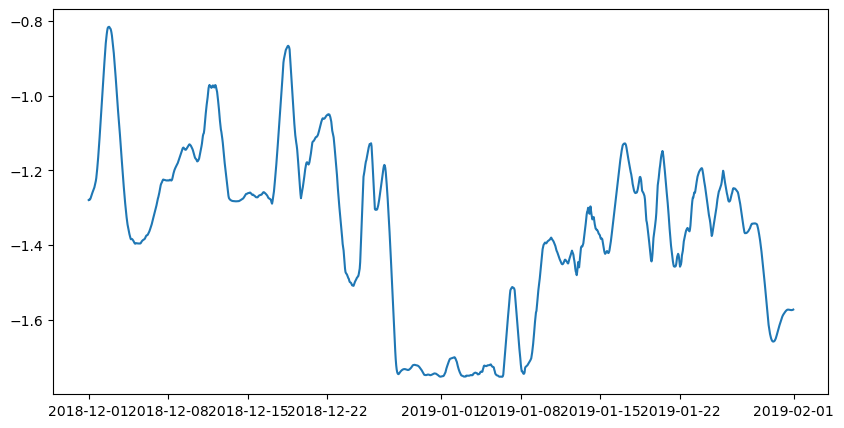

In [10]:
# # specify date to import
date_list = pd.date_range(datetime(2018, 12, 1, 0), datetime(2019, 1,31, 23), freq="H")

#============================

#  # read in the data files
df_upwelling = pd.read_csv(f"/Users/reu/Box/Data/MARES_M1_16m_2016_2019.csv", index_col=None)
times = pd.to_datetime(df_upwelling.time.values)
time_range = (times >= (date_list[0])) & (times <= (date_list[-1]))
fig, ax = plt.subplots(figsize = (10, 5))
plt.plot(times[time_range], df_upwelling.Tmean.values[time_range])

# #export CSV
# d = {'time': times[time_range], 'Tmean_C': df_upwelling.Tmean.values[time_range], 'Tmin_C': df_upwelling.Tmin.values[time_range], 'Tmax_C': df_upwelling.Tmax.values[time_range]}
# df = pd.DataFrame(data=d)
# df.to_csv(f'/Users/reu/Box/Data/{date_list[-1].year}upwelling_hourly.csv', index=None) #removes Index column


## export to CSV files for each year

In [45]:
d = {'time': times[time_range], 'Tmean_C': df_upwelling.Tmean.values[time_range], 'Tmin_C': df_upwelling.Tmin.values[time_range], 'Tmax_C': df_upwelling.Tmax.values[time_range]}
df = pd.DataFrame(data=d)
df.to_csv(f'/Users/reu/Box/Data/{date_list[-1].year}upwelling_hourly.csv', index=None) #removes Index column

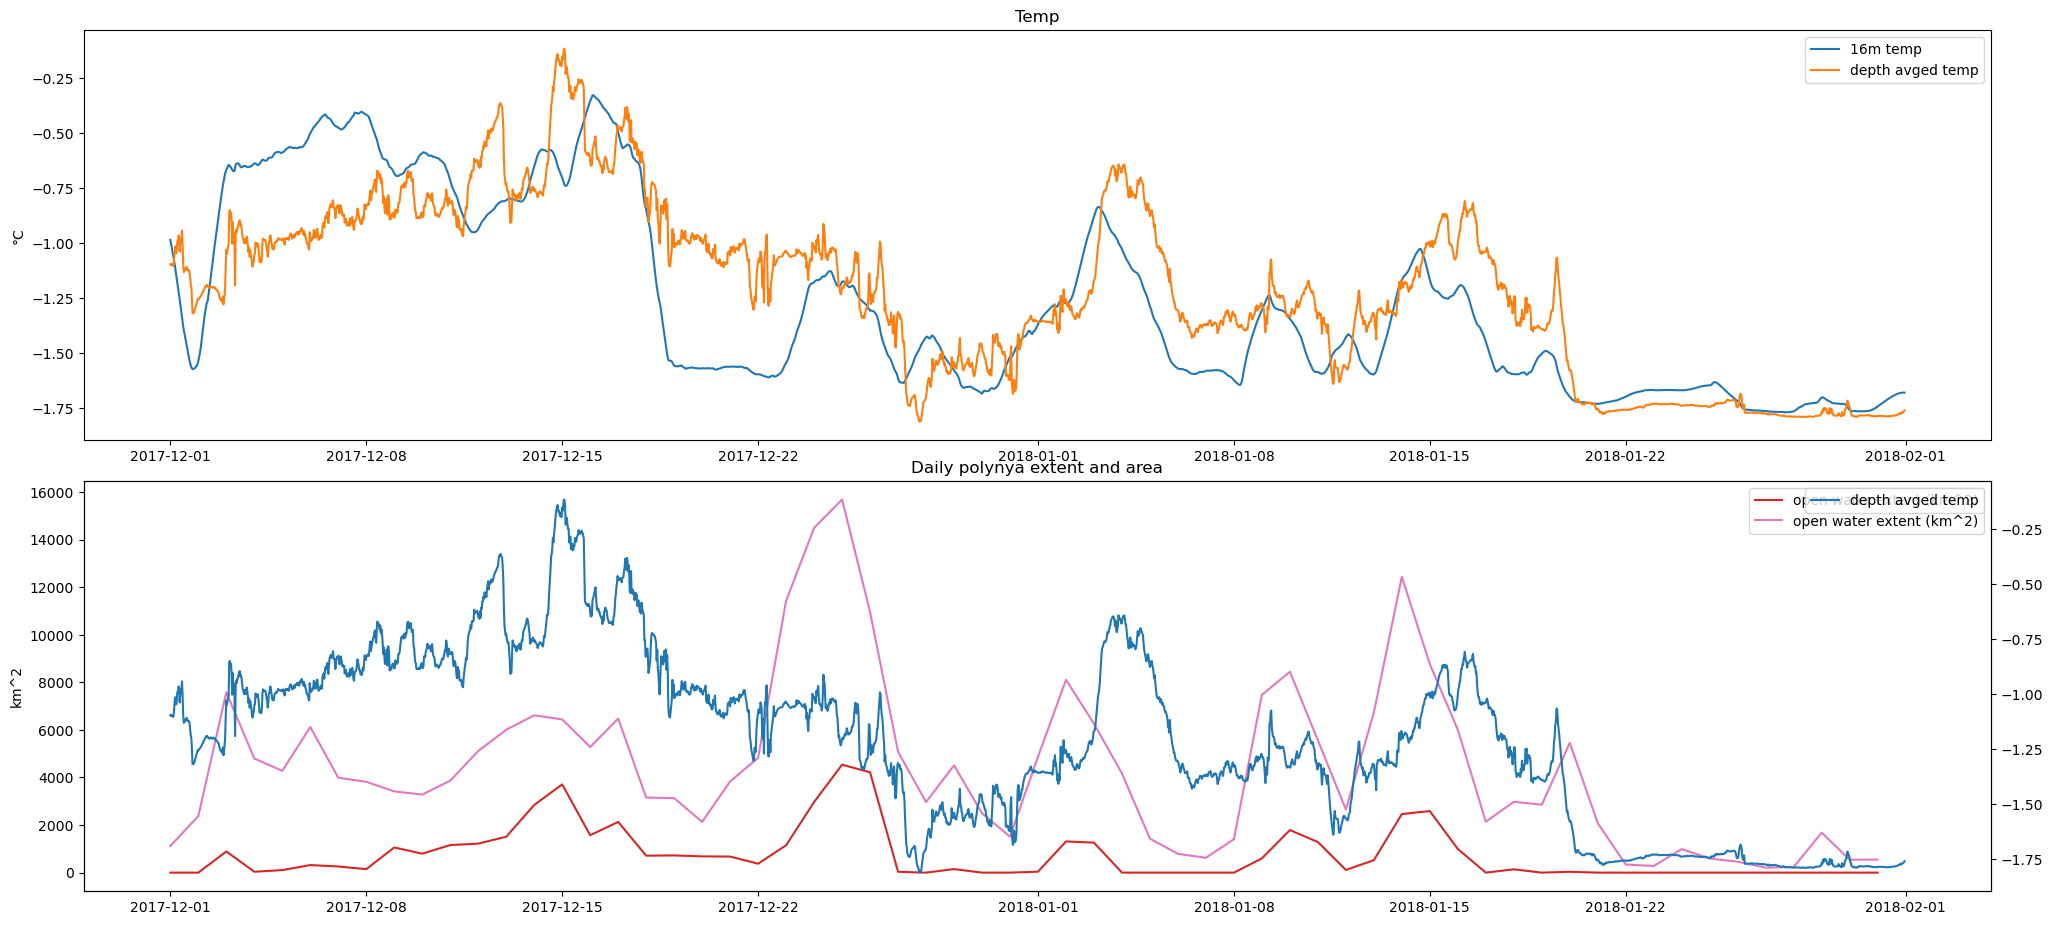

In [40]:
# # specify date to import
date_list = pd.date_range(datetime(2017, 12, 1, 0), datetime(2018, 1,31, 23), freq="H")
date_list_T = pd.date_range(datetime(2017, 12, 1, 0), datetime(2018, 1,31, 23), freq="30min")

#============================

#  # read in the data files
df_upwelling = pd.read_csv(f"/Users/reu/Box/Data/MARES_M1_16m_2016_2019.csv", index_col=None)
times = pd.to_datetime(df_upwelling.time.values)
time_range = (times >= (date_list[0])) & (times <= (date_list[-1]))

df_daily_size_2018 = pd.read_csv("/Users/reu/Box/Data/2018SIC.csv")
time_daily = pd.to_datetime(df_daily_size_2018.time)

path1 = "/Volumes/Seagate2/M1/M1_ocean_tempsalinity_2016_2017.nc"
path2 = "/Volumes/Seagate2/M1/M1_ocean_tempsalinity_2017_2019.nc"
ds = xr.open_mfdataset([path1, path2])
ds.close

T = ds.T.sel(time=slice(date_list[0] , date_list[-1])).mean(dim='depth')


# ======================

fig, ax = plt.subplots(2, 1, figsize = (20,10))

labeldata = ("°C", "km^2")

for i, (unit) in enumerate(labeldata):
    ax[i].set_ylabel(unit)
    # ax[i].axvspan(datetime(2011, 1,3), datetime(2011, 1, 8), facecolor='lightgray', alpha=0.2)
plt.tight_layout()
fig.subplots_adjust(top=.9)

ax[0].plot(times[time_range], df_upwelling.Tmean.values[time_range], label = '16m temp')
ax[0].plot(date_list_T, T, label = 'depth avged temp')
ax[0].set_title('Temp')
ax[0].legend()

ax[1].plot(time_daily, df_daily_size_2018.Open_water_extent_km2, 'tab:red', label = 'open water extent (km^2)')
ax[1].plot(time_daily, df_daily_size_2018.Open_water_area_km2, 'tab:pink', label = 'open water extent (km^2)')
ax[1].set_title('Daily polynya extent and area')
ax[1].legend()
# ax[1].set_ylim(0,40000)

axtwin = ax[1].twinx()
axtwin.plot(date_list_T, T, label = 'depth avged temp')
axtwin.legend(loc='upper right')


In [28]:
# pick a date
date_list = pd.date_range(datetime(2017, 12, 1, 0), datetime(2018, 1, 31, 23), freq="30min")

#importing the dataset

path1 = "/Volumes/Seagate2/M1/M1_ocean_tempsalinity_2016_2017.nc"
path2 = "/Volumes/Seagate2/M1/M1_ocean_tempsalinity_2017_2019.nc"
ds = xr.open_mfdataset([path1, path2])
ds.close

T = ds.T.sel(time=slice(date_list[0] , date_list[-1])).mean(dim='depth')

2975
2975
